<a href="https://colab.research.google.com/github/AjayJohnAlex/ANN/blob/master/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("hello")

hello


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [0]:
df = pd.read_csv('/content/Weather_data.csv')
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [0]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,98294.000000,98913.000000,98913.000000,29111.000000,98160.000000,0.0,9.868200e+04,98913.000000,98913.00000,98244.000000,98913.000000,98913.000000,94497.000000,84533.000000,1063.000000,573.000000,96560.000000
mean,15.817130,0.067109,0.000131,35.659606,57.774358,NaN,1.951861e+03,0.026498,0.00001,25.578427,0.009362,0.000020,2.419885,162.550980,37.704516,5.708202,7.685854
std,7.096917,0.250213,0.011464,5.013579,23.754463,NaN,3.217101e+05,0.160612,0.00318,8.464732,0.096303,0.004497,20.970678,120.019889,6.841070,1.205967,11.995965
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.00000,19.000000,0.000000,0.000000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,58.000000,NaN,1.008000e+03,0.000000,0.00000,27.000000,0.000000,0.000000,2.000000,150.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,77.000000,NaN,1.014000e+03,0.000000,0.00000,32.000000,0.000000,0.000000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.00000,90.000000,1.000000,1.000000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 20 columns):
datetime_utc    98913 non-null object
 _conds         98845 non-null object
 _dewptm        98294 non-null float64
 _fog           98913 non-null int64
 _hail          98913 non-null int64
 _heatindexm    29111 non-null float64
 _hum           98160 non-null float64
 _precipm       0 non-null float64
 _pressurem     98682 non-null float64
 _rain          98913 non-null int64
 _snow          98913 non-null int64
 _tempm         98244 non-null float64
 _thunder       98913 non-null int64
 _tornado       98913 non-null int64
 _vism          94497 non-null float64
 _wdird         84533 non-null float64
 _wdire         84533 non-null object
 _wgustm        1063 non-null float64
 _windchillm    573 non-null float64
 _wspdm         96560 non-null float64
dtypes: float64(11), int64(6), object(3)
memory usage: 15.1+ MB


In [0]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'],infer_datetime_format=True)
df = df.set_index(['datetime_utc'])
df.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [0]:
df.columns

Index([' _conds', ' _dewptm', ' _fog', ' _hail', ' _heatindexm', ' _hum',
       ' _precipm', ' _pressurem', ' _rain', ' _snow', ' _tempm', ' _thunder',
       ' _tornado', ' _vism', ' _wdird', ' _wdire', ' _wgustm', ' _windchillm',
       ' _wspdm'],
      dtype='object')

In [0]:
forecast = df.drop([' _conds', ' _dewptm', ' _fog', ' _hail', ' _heatindexm', ' _hum',
       ' _precipm', ' _pressurem', ' _rain', ' _snow',' _thunder',
       ' _tornado', ' _vism', ' _wdird', ' _wdire', ' _wgustm', ' _windchillm',
       ' _wspdm'],axis=1)

forecast.head()

,_tempm
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


In [0]:
forecast.isna().sum()

 _tempm    669
dtype: int64

In [0]:
forecast.describe()

,_tempm
count,98244.000000
mean,25.578427
std,8.464732
min,1.000000
25%,19.000000
50%,27.000000
75%,32.000000
max,90.000000


In [0]:
forecast = forecast.dropna()
forecast.head()

,_tempm
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


In [0]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98244 entries, 1996-11-01 11:00:00 to 2016-11-30 21:00:00
Data columns (total 1 columns):
 _tempm    98244 non-null float64
dtypes: float64(1)
memory usage: 1.5 MB


Text(0.5, 1.0, 'Checking if the Data is stationary.')

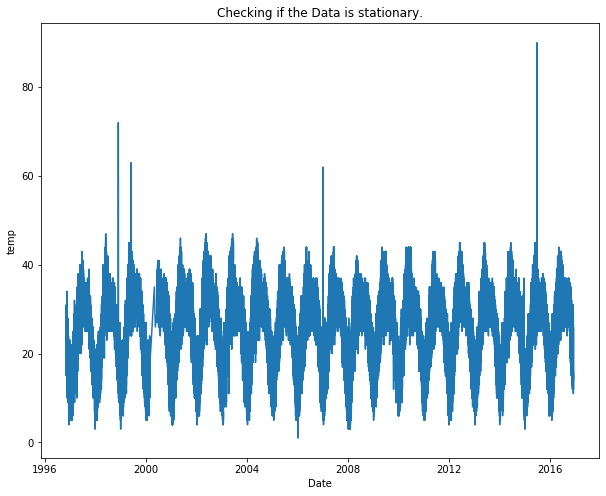

In [0]:
plt.figure(figsize=(10,8))
plt.plot(forecast)
plt.xlabel('Date')
plt.ylabel('temp')
plt.title('Checking if the Data is stationary.')

# Rolling Stats

In [0]:
rolling_mean = forecast.rolling(window=24).mean()
rolling_std = forecast.rolling(window=24).std()

# print(rolling_mean,rolling_std)

Text(0.5, 1.0, 'Rolling Std and Mean')

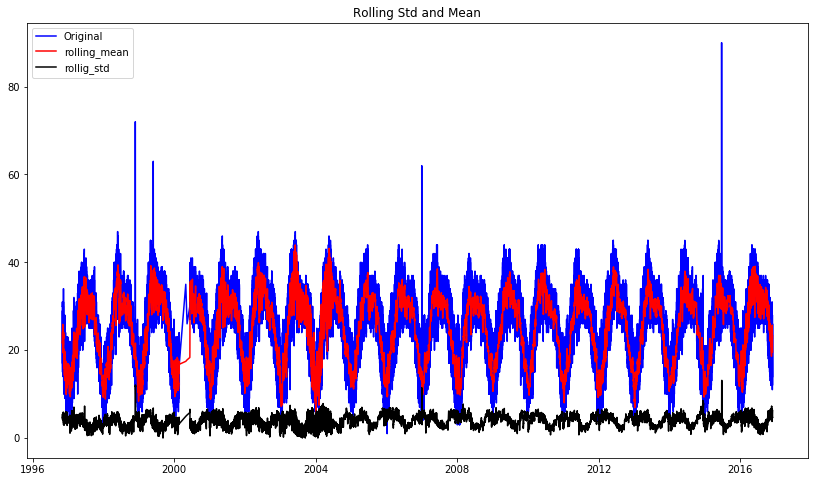

In [0]:
plt.figure(figsize=(14,8))
plt.plot(forecast,color='blue',label= 'Original')
plt.plot(rolling_mean ,color = 'red',label='rolling_mean')
plt.plot(rolling_std,color='black',label='rollig_std')
plt.legend(loc='best')
plt.title('Rolling Std and Mean')

In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
forecast.head()

,_tempm
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


In [0]:
forecast[' _tempm']

datetime_utc
1996-11-01 11:00:00    30.0
1996-11-01 12:00:00    28.0
1996-11-01 13:00:00    24.0
1996-11-01 14:00:00    24.0
1996-11-01 16:00:00    23.0
                       ... 
2016-11-30 12:30:00    21.0
2016-11-30 13:00:00    19.0
2016-11-30 15:00:00    17.0
2016-11-30 18:00:00    15.0
2016-11-30 21:00:00    14.0
Name:  _tempm, Length: 98244, dtype: float64

# ADFC TEST

In [0]:
print("Print of ADFULLER Test")

adfuller_test = adfuller(forecast[' _tempm'],autolag='AIC',)

adfuller_output = pd.Series(adfuller_test[0:4],index=['Test Stats','P-value','#Lags used','No of obs used'])

for keys,value in adfuller_test[4].items():

  adfuller_output['Critical value (%s)'%keys] = value

print(adfuller_output)

Print of ADFULLER Test
Test Stats             -7.523041e+00
P-value                 3.746839e-11
#Lags used              6.800000e+01
No of obs used          9.817500e+04
Critical value (1%)    -3.430417e+00
Critical value (5%)    -2.861569e+00
Critical value (10%)   -2.566786e+00
dtype: float64


### As the ADFC test shows and by Rolling stats we have a stationary data

## USING BASELINE MODEL

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
baseline_df = pd.concat([forecast[' _tempm'],forecast[' _tempm'].shift(1)],axis=1)
baseline_df.head()

,_tempm,_tempm
datetime_utc,,
1996-11-01 11:00:00,30.0,NaN
1996-11-01 12:00:00,28.0,30.0
1996-11-01 13:00:00,24.0,28.0
1996-11-01 14:00:00,24.0,24.0
1996-11-01 16:00:00,23.0,24.0


In [0]:
baseline_df.dropna(inplace=True)
baseline_df.head()

,_tempm,_tempm
datetime_utc,,
1996-11-01 12:00:00,28.0,30.0
1996-11-01 13:00:00,24.0,28.0
1996-11-01 14:00:00,24.0,24.0
1996-11-01 16:00:00,23.0,24.0
1996-11-01 17:00:00,21.0,23.0


In [0]:
baseline_df.columns = ['Actual_temp',"predicted_temp"]
baseline_df.head()

,Actual_temp,predicted_temp
datetime_utc,,
1996-11-01 12:00:00,28.0,30.0
1996-11-01 13:00:00,24.0,28.0
1996-11-01 14:00:00,24.0,24.0
1996-11-01 16:00:00,23.0,24.0
1996-11-01 17:00:00,21.0,23.0


In [0]:
np.sqrt(mean_squared_error(baseline_df['Actual_temp'],baseline_df['predicted_temp']))

2.6318009867663634

### Using a baseline model we get an error of 2.63 that means we have could make an error of 2.63 from the actual value ; either more or less

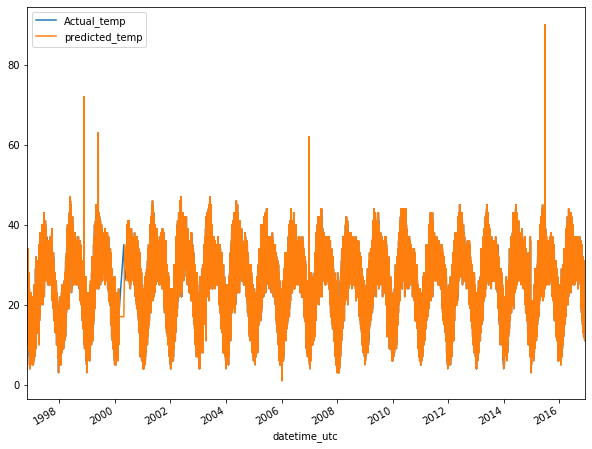

In [0]:
plt.figure(figsize=(10,8))
baseline_df['Actual_temp'].plot(legend=True)
baseline_df['predicted_temp'].plot(legend=True)

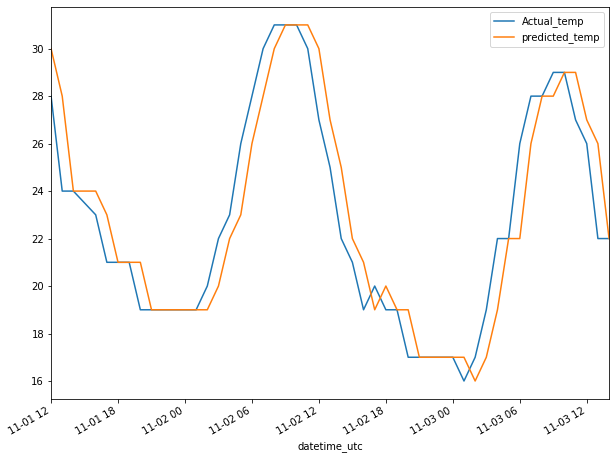

In [0]:
actual_forecast = baseline_df['Actual_temp'][:50]
pred_forecast = baseline_df['predicted_temp'][:50]

plt.figure(figsize=(10,8))
actual_forecast.plot(legend=True)
pred_forecast.plot(legend=True)

#### Now we would be using ARIMA model to predict the weather values.

#### ARIMA  =  AutoRegressive(p) Integrated(d) Moving Average(q)


#### We will find the values of q with the plot_acf and value of p with the plot_pacf ; the value of d is usually in the range of [1,2] 

In [0]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

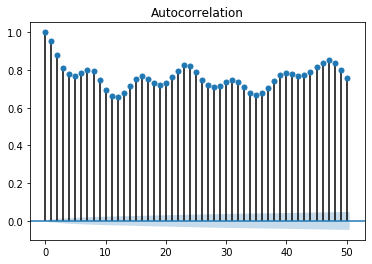

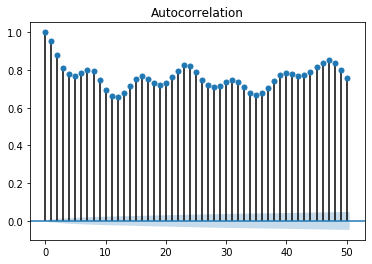

In [0]:
plot_acf(forecast)

In [0]:
# SO the values of Q can be [2,3,4]

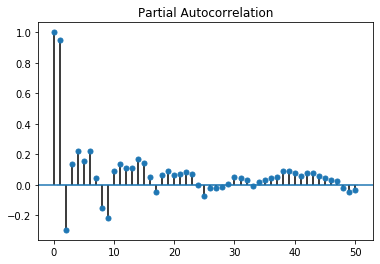

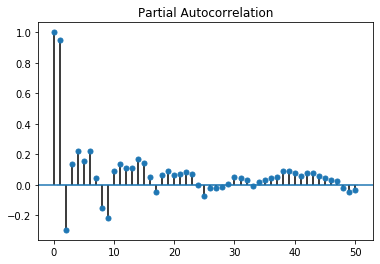

In [0]:
plot_pacf(forecast)

In [0]:
# SO we can take P value as [1,3,4]

In [0]:
train = forecast[0:round(len(forecast)*.8)]
train.size

78595

In [0]:
train.shape

(78595, 1)

In [0]:
test = forecast[round(len(forecast)*.8):]
test.size

19649

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
p_value = range(0,5)
q_value = range(0,5)
d_value = range(0,3)

In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [0]:
for p in p_value:
  for q in q_value:
    for d in d_value:
      order = (p,d,q)
      try:
          
        model = ARIMA(train,order=order).fit(disp=0)

        print(f"The AIC for this {order } is {model.aic}")

        predictions = model.forecast(steps=len(test))[0]
        error = np.sqrt(mean_squared_error(predictions,test))

        print(f"The error is {error}\n")
      except:
        continue


The AIC for this (0, 0, 0) is 559477.097917704
The error is 8.316581323999351

The AIC for this (0, 1, 0) is 358624.731775008
The error is 20.360294140131085

The AIC for this (0, 2, 0) is 386622.5498092899
The error is 10299.721187206043

The AIC for this (0, 0, 1) is 473942.4411724516
The error is 8.316111290769022

The AIC for this (0, 1, 1) is 351259.74242731615
The error is 20.503470229825226

The AIC for this (0, 2, 1) is 358635.8649952054
The error is 26.12584568623693

The AIC for this (0, 1, 2) is 350986.5833505594
The error is 20.730220337556126

The AIC for this (0, 2, 2) is 351269.3430239993
The error is 27.282132184931

The AIC for this (0, 1, 3) is 348055.88498152525
The error is 18.797497133617423

The AIC for this (0, 2, 3) is 350995.9568317558
The error is 26.27648327620529

The AIC for this (0, 1, 4) is 344270.8083163495
The error is 13.6510807141584

The AIC for this (1, 0, 0) is 357093.8250473398
The error is 8.300654618717049

The AIC for this (1, 1, 0) is 351920.4

In [0]:
weather_model = ARIMA(train,order=(1,0,4)).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
weather_model.aic

344244.0636666033

In [0]:
weather_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 _tempm   No. Observations:                78595
Model:                     ARMA(1, 4)   Log Likelihood             -172115.032
Method:                       css-mle   S.D. of innovations              2.162
Date:                Wed, 29 Jan 2020   AIC                         344244.064
Time:                        13:41:10   BIC                         344308.968
Sample:                             0   HQIC                        344263.976
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            25.3617      1.209     20.982      0.000      22.993      27.731
ar.L1. _tempm     0.9990      0.000   5834.169      0.000       0.999       0.999
ma.L1. _tempm     0.1800      0.003     52.898      0.000       0.173       0.187
ma.L2. _tempm    -0.2505      0.003    -78.713      0.000      -0.257      -0.244
ma.L3. _tempm    -0.4876      0.003   -140.772      0.000      -0.494      -0.481
ma.L4. _tempm    -0.2909      0.003    -92.368      0.000      -0.297      -0.285
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           +0.0000j            1.0010            0.0000
MA.1            1.0484           -0.0000j            1.0484           -0.0000
MA.2           -0.5253           -1.2973j            1.3996           -0.3112
MA.3           -0.5253           +1.2973j            1.3996            0.3112
MA.4           -1.6738           -0.0000j            1.6738           -0.5000
-----------------------------------------------------------------------------
"""

In [0]:
weather_forecast = weather_model.forecast(steps=19649)[0]

In [0]:
expected_forecast = weather_model.predict(start=round(len(forecast)*.8),end=len(forecast)-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [0]:
np.sqrt(mean_squared_error(expected_forecast,test))

8.215554903433699

In [0]:
test[:5]

,_tempm
datetime_utc,
2010-12-02 03:00:00,10.0
2010-12-02 06:00:00,21.0
2010-12-02 09:00:00,23.0
2010-12-02 12:00:00,20.0
2010-12-02 15:00:00,14.0


In [0]:
expected_forecast[:5]

78595    10.911511
78596    13.210351
78597    15.512793
78598    16.190786
78599    16.199511
dtype: float64

In [0]:
actual = test[:50]
pred = expected_forecast[:50]

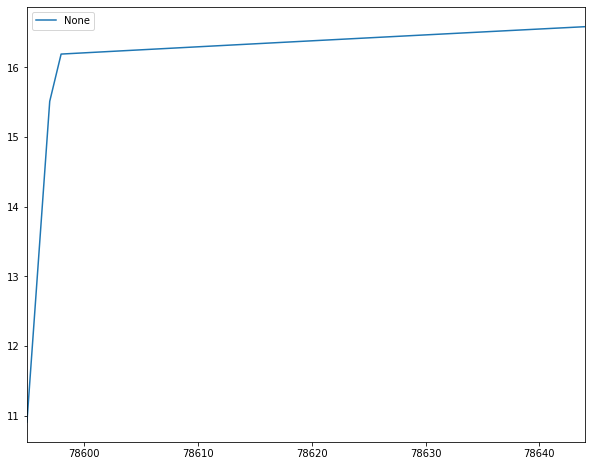

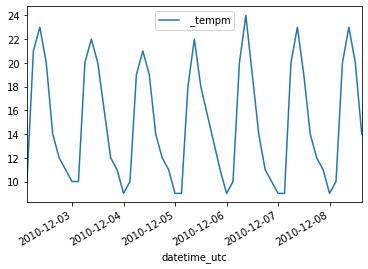

In [0]:
plt.figure(figsize=(10,8))
pred.plot(legend=True)
actual.plot(legend=True)

In [0]:
USing LSTM

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train)
scaled_test_data = scaler.transform(test)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 250
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [0]:
lstm_model.fit_generator(generator,epochs=2)

Epoch 1/2
12879/78345 [===>..........................] - ETA: 6:06:23 - loss: 0.0015